#Linear Regression (Using Numpy):

In [ ]:
import numpy as np

In [ ]:
#Linear Regression:

# f = w * x
# leave bias (b)

# Suppose, w = 2
# f = 2 * x

In [ ]:
X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

In [ ]:
w = 0.0

In [ ]:
#model prediction:
def forward(x):
  return w * x

In [ ]:
#loss (Mean Squared Error)
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

In [ ]:
#Gradient:
#MSE = 1/n * [(w*x) - y]**2
#dJ/dw = 1/n * 2x * [(w*x) - y]

def gradient(x,y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

In [ ]:
learning_rate = 0.01
iters = 10

In [ ]:
print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000


In [ ]:
#Training:

losses = []

for epoch in range(iters):

  #prediction = forward pass
  y_pred = forward (X)

  #loss
  l = loss (Y, y_pred)

  losses.append(l)

  #gradients
  dw = gradient (X, Y, y_pred)

  #update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206


In [ ]:
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction after training: f(5) = 9.999


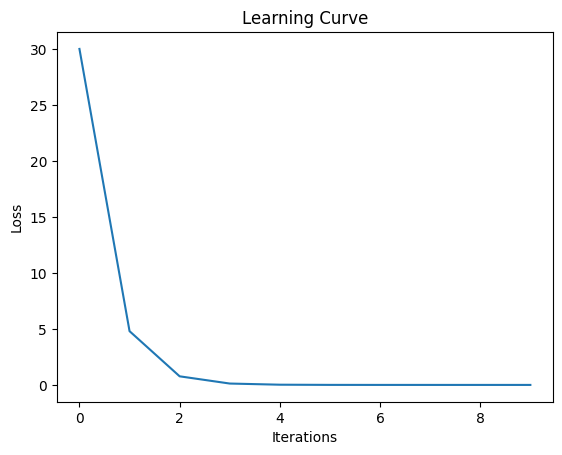

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

#Linear Regression (Using Torch Gradients):

In [ ]:
import torch

In [ ]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

In [ ]:
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

In [ ]:
#model prediction:
def forward(x):
  return w * x

In [ ]:
#loss (Mean Squared Error)
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

In [ ]:
learning_rate = 0.01
iters = 50

In [ ]:
print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000


In [ ]:
#Training:

losses = []

for epoch in range(iters):

  #prediction = forward pass
  y_pred = forward (X)

  #loss
  l = loss (Y, y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  losses.append(l.item())

  #update weights
  with torch.no_grad():
    #inorder to not include this operation in computation graph
    w -= learning_rate * w.grad

  #zero gradients
  w.grad.zero_() #empty the gradients for next iteration

  if epoch % 5 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 6: w = 1.246, loss = 5.90623236
epoch 11: w = 1.665, loss = 1.16278565
epoch 16: w = 1.851, loss = 0.22892261
epoch 21: w = 1.934, loss = 0.04506890
epoch 26: w = 1.971, loss = 0.00887291
epoch 31: w = 1.987, loss = 0.00174685
epoch 36: w = 1.994, loss = 0.00034392
epoch 41: w = 1.997, loss = 0.00006770
epoch 46: w = 1.999, loss = 0.00001333


In [ ]:
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction after training: f(5) = 9.997


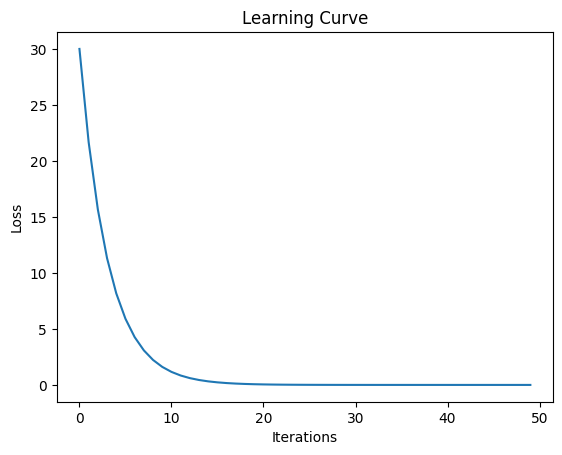

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

#Training Pipeline:
1. Design Model (input, output size, forward pass)
2. Construct Loss and optimizer
3. Training Loop:
- forward pass: compute prediction
- backward pass: gradients
- update weights


#Linear Regression (Using Loss & Optimizer):

In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

In [ ]:
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

In [ ]:
#model prediction:
def forward(x):
  return w * x

In [ ]:
learning_rate = 0.01
iters = 50

In [ ]:
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate) #SGD = Stochastic Gradient Descent
#Takes a list of parameters & the learning rate

In [ ]:
print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000


In [ ]:
#Training:

losses = []

for epoch in range(iters):

  #prediction = forward pass
  y_pred = forward (X)

  #loss
  l = loss (Y, y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  losses.append(l.item())

  #update weights
  optimizer.step() #takes optimization step

  #zero gradients
  optimizer.zero_grad() #empty the gradients for next iteration

  if epoch % 5 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 6: w = 1.246, loss = 5.90623236
epoch 11: w = 1.665, loss = 1.16278565
epoch 16: w = 1.851, loss = 0.22892261
epoch 21: w = 1.934, loss = 0.04506890
epoch 26: w = 1.971, loss = 0.00887291
epoch 31: w = 1.987, loss = 0.00174685
epoch 36: w = 1.994, loss = 0.00034392
epoch 41: w = 1.997, loss = 0.00006770
epoch 46: w = 1.999, loss = 0.00001333


In [ ]:
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction after training: f(5) = 9.997


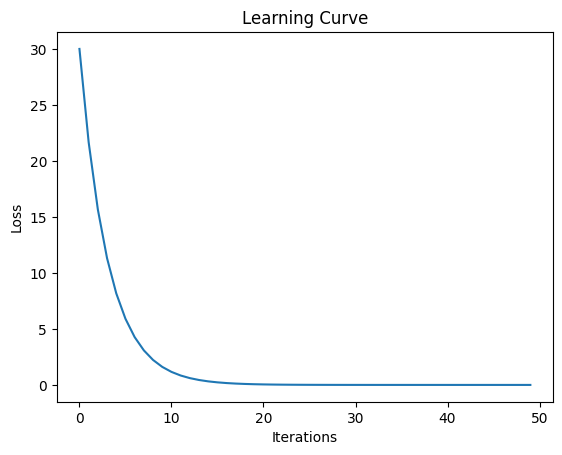

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

#Linear Regression (Using a Model):

In [ ]:
import torch
import torch.nn as nn

In [ ]:
#2D Tensors:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

In [ ]:
n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [ ]:
input_size = n_features
output_size = n_features

In [ ]:
#Using Built in model

#model = nn.Linear(input_size, output_size)

In [ ]:
#Custom Model:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

In [ ]:
model = LinearRegression(input_size, output_size)

In [ ]:
learning_rate = 0.01
iters = 100

In [ ]:
loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #SGD = Stochastic Gradient Descent
#Takes a list of parameters & the learning rate

In [ ]:
X_test = torch.tensor([[5]], dtype = torch.float32)
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

Prediction before training: f(5) = 5.111


In [ ]:
#Training:
losses = []
for epoch in range(iters):

  #prediction = forward pass
  y_pred = model(X)

  #loss
  l = loss (Y, y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  losses.append(l.item())

  #update weights
  optimizer.step() #takes optimization step

  #zero gradients
  optimizer.zero_grad() #empty the gradients for next iteration

  if epoch % 5 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

epoch 1: w = 0.960, loss = 5.58449602
epoch 6: w = 1.344, loss = 1.09519684
epoch 11: w = 1.501, loss = 0.36728072
epoch 16: w = 1.568, loss = 0.24455070
epoch 21: w = 1.598, loss = 0.21933106
epoch 26: w = 1.614, loss = 0.20995779
epoch 31: w = 1.623, loss = 0.20329012
epoch 36: w = 1.630, loss = 0.19721033
epoch 41: w = 1.637, loss = 0.19137287
epoch 46: w = 1.642, loss = 0.18571800
epoch 51: w = 1.648, loss = 0.18023169
epoch 56: w = 1.653, loss = 0.17490789
epoch 61: w = 1.658, loss = 0.16974123
epoch 66: w = 1.663, loss = 0.16472721
epoch 71: w = 1.668, loss = 0.15986125
epoch 76: w = 1.673, loss = 0.15513924
epoch 81: w = 1.678, loss = 0.15055659
epoch 86: w = 1.683, loss = 0.14610933
epoch 91: w = 1.688, loss = 0.14179339
epoch 96: w = 1.692, loss = 0.13760504


In [ ]:
print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

Prediction after training: f(5) = 9.374


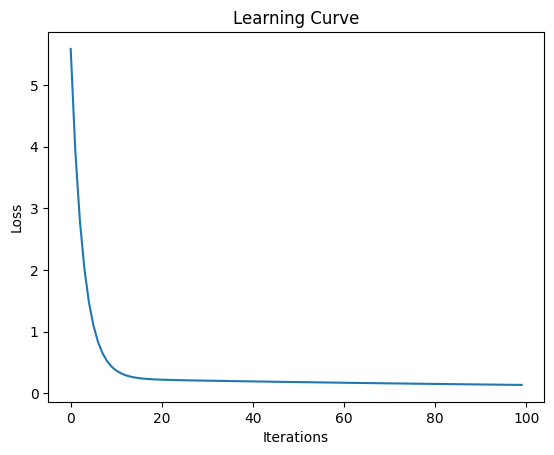

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()